In [25]:
import pandas as pd

In [26]:
def data_prep(year,month,df):
    df.drop(['road_type','transfer_type','transition_date'],axis=1,inplace=True)
    # if month==1:
    #     df.drop('_id',axis=1,inplace=True)
    df.dropna(inplace=True)
    a = df.groupby(['line', 'transport_type_id'])['number_of_passenger'].sum()
    b = df.groupby(['line', 'transport_type_id'])['transition_hour'].mean()
    c = df.groupby(['line', 'transport_type_id'])['number_of_passage'].sum()

    # Her bir gruplama sonucunu DataFramelere dönüştürün ve sütun isimlerini belirtelim
    a = a.reset_index()
    a.columns = ['line', 'transport_type_id', 'number_of_passenger']

    b = b.reset_index()
    b.columns = ['line', 'transport_type_id', 'transition_hour']

    c = c.reset_index()
    c.columns = ['line', 'transport_type_id', 'number_of_passage']

    # Her bir DataFrame'i birleştirelim
    mix_df = pd.concat([a, b['transition_hour'], c['number_of_passage']], axis=1)
    
    mix_df['year'] = year
    mix_df['month'] = month
    
    sira = ['line', 'month', 'year','transport_type_id', 'transition_hour', 'number_of_passage', 'number_of_passenger']
    sira = list(dict.fromkeys(sira))  # Sira listesindeki yinelenen sütunların gelmesinden korunalım
    mix_df = mix_df[sira]
    return mix_df

In [27]:
ocak = pd.read_csv('Ocak_2022.csv')
ocak_df = data_prep(2022,1,ocak)

In [28]:
subat = pd.read_csv('Subat_2022.csv')
subat_df = data_prep(2022,2,subat)

In [29]:
mart = pd.read_csv('Mart_2022.csv')
mart_df = data_prep(2022,3,mart)

In [30]:
nisan = pd.read_csv('Nisan_2022.csv')
nisan_df = data_prep(2022,4,nisan)

In [31]:
mayis = pd.read_csv('Mayis_2022.csv')
mayis_df = data_prep(2022,5,mayis)

In [32]:
haziran = pd.read_csv('Haziran_2022.csv')
haziran_df = data_prep(2022,6,haziran)

In [33]:
temmuz = pd.read_csv('Temmuz_2022.csv')
temmuz_df = data_prep(2022,7,temmuz)

In [34]:
agustos = pd.read_csv('Agustos_2022.csv')
agustos_df = data_prep(2022,8,agustos)

In [35]:
eylul = pd.read_csv('Eylul_2022.csv')
eylul_df = data_prep(2022,9,eylul)

In [36]:
ekim = pd.read_csv('Ekim_2022.csv')
ekim_df = data_prep(2022,10,ekim)

In [37]:
kasim = pd.read_csv('Kasim_2022.csv')
kasim_df = data_prep(2022,11,kasim)

In [38]:
aralik = pd.read_csv('Aralik_2022.csv')
aralik_df = data_prep(2022,12,aralik)

In [39]:
mix_df = pd.concat([ocak_df,mart_df,nisan_df,mayis_df,haziran_df,temmuz_df,agustos_df,eylul_df,ekim_df,kasim_df,aralik_df], ignore_index=True)

In [40]:
mix_df.to_csv('2022.csv', index=False)

In [41]:
mix_df.head()

,line,month,year,transport_type_id,transition_hour,number_of_passage,number_of_passenger
0,EMINONU-OKMEYDANI,1,2022,1,13.931202,58011,57783
1,KARTAL-AYDOS HILAL KONUTLARI,1,2022,1,13.910646,68634,68275
2,A.YESEVI MAH-UMRANIYE,1,2022,1,13.293970,25551,25514
3,ACARLAR SITESI / ATASEHIR - USKUDAR,1,2022,1,13.553996,25734,25704
4,ADA TAKSI,1,2022,1,13.213115,16608,16393


In [49]:
a2022 = pd.read_csv("2022.csv")
a2021 = pd.read_csv("2021.csv")

In [50]:
mix_df = pd.concat([a2021, a2022], ignore_index=True)
mix_df['intensity'] = mix_df['number_of_passenger']/mix_df['number_of_passage']

In [51]:
mix_df.to_csv('data.csv', index=False)


In [70]:
mix_df = mix_df[mix_df['number_of_passage'] >= 100]

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def plot_distributions(dataframe, columns,kde=False, log_transform=False, label_angle=0, 
                       figsize = (8,3) , order_cats= False, target_pie=False, alert=False): 

    if alert == True:
        pie_palette = alert_palette
    else:
        pie_palette = sequential_palette
        
    if target_pie == True:
        ax = dataframe[columns].value_counts().plot.pie(autopct='%1.1f%%',
                                              textprops={'fontsize':10},
                                              colors=pie_palette
                                              ).set_title(f"{cnf.target} Distribution")
        plt.ylabel('')
        plt.show()

    else:
        for col in columns:
            if log_transform == True:
                x = np.log10(dataframe[col])
                title = f'{col} - Log Transformed'
            else:
                x = dataframe[col]
                title = f'{col}'
            
            if order_cats == True:
                
                print(pd.DataFrame({col: dataframe[col].value_counts(),
                            "Ratio": 100 * dataframe[col].value_counts() / len(dataframe)}))
            
                print("##########################################")
                
                print(f"NA in {col} : {dataframe[col].isnull().sum()}")
                
                print("##########################################")

                labels = dataframe[col].value_counts(ascending=False).index
                values = dataframe[col].value_counts(ascending=False).values
                
                plt.subplots(figsize=figsize)
                plt.tight_layout()
                plt.xticks(rotation=label_angle)
                sns.barplot(x=labels,
                            y=values,
                            palette = sequential_palette)
                        
            else:   
            
                quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
                print(dataframe[col].describe(quantiles).T)

                plt.subplots(figsize=figsize)
                plt.tight_layout()
                plt.xticks(rotation=label_angle)
                sns.histplot(x,
                        bins=50,
                        kde=kde,
                        color = sequential_palette[0])

    
            plt.title(title)
            plt.show()
bright_palette = sns.color_palette('bright')
muted_palette = sns.color_palette('muted')
sequential_palette = sns.color_palette('light:dodgerblue_r',9)
alert_palette = sns.color_palette('Reds_r',9)
paired_palette = sns.color_palette('Paired')
def numeric_variables_boxplot(df, num_cols, target=None, alert=False):

    if alert == True:
        palette = alert_palette
    else:
        palette = bright_palette
        
    if target == None:
        
        fig, [ax1,ax2,ax3,ax4] = plt.subplots(1,4, figsize=(7,3))

        for col, ax, i in zip(num_cols, [ax1,ax2,ax3,ax4], range(4)):
            sns.boxplot(df[col], 
                        color=palette[i], 
                        ax=ax
                        ).set_title(col)
            
        for ax in [ax1,ax2,ax3,ax4]:
            ax.set_xticklabels([])
    else:
        for col in num_cols:
            plt.subplots(figsize=(7,3))
            sns.boxplot(x=df[target], 
                                y=df[col],
                                hue=df[target],
                                dodge=False, 
                                fliersize=3,
                                linewidth=0.7,
                                palette=palette)
            plt.title(col)
            plt.xlabel('')
            plt.ylabel('')
            plt.xticks(rotation=45)
            plt.legend('',frameon=False)

    plt.tight_layout()
    plt.show()

count    1.803900e+04
mean     2.006309e+05
std      1.062539e+06
min      1.000000e+00
5%       2.059900e+03
10%      3.941800e+03
20%      8.433800e+03
30%      1.614820e+04
40%      2.655860e+04
50%      4.099700e+04
60%      6.512960e+04
70%      1.031412e+05
80%      1.698814e+05
90%      2.966676e+05
95%      4.540856e+05
99%      3.772629e+06
max      2.263521e+07
Name: number_of_passage, dtype: float64


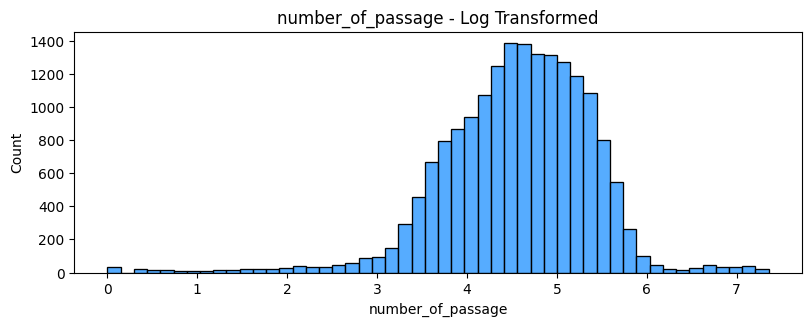

In [69]:
plot_distributions(mix_df,['number_of_passage'],log_transform=True)

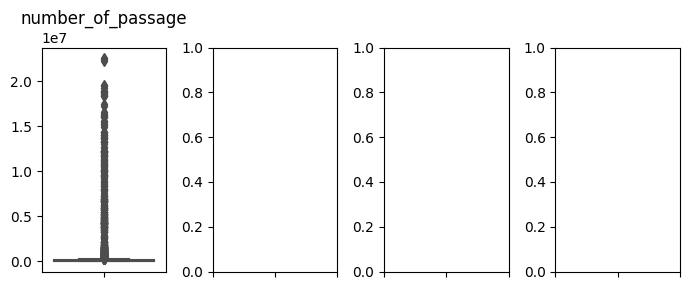

In [60]:
numeric_variables_boxplot(mix_df,['number_of_passage'])

In [45]:
# mix_df.head()

In [46]:
# mix_df.shape

(9154, 7)

In [47]:
# df = pd.read_csv('data.csv')
# df['intensity'] = df['number_of_passenger']/df['number_of_passage']

In [48]:
# df.head()